In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('daily-min-temperatures.xls', parse_dates = ['Date'], index_col = 'Date')

In [3]:
X = df.values

In [4]:
print('Shape of data \t', df.shape)

Shape of data 	 (3650, 1)


In [5]:
print('Original Dataset:\n', df.head())

Original Dataset:
             Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


In [6]:
print('After Extracting only temperature:\n', X)

After Extracting only temperature:
 [[20.7]
 [17.9]
 [18.8]
 ...
 [13.5]
 [15.7]
 [13. ]]


<Axes: xlabel='Date'>

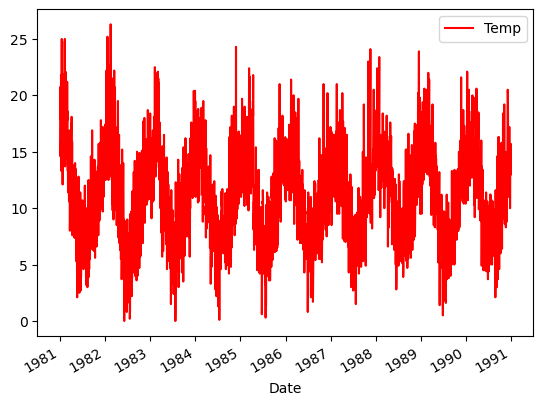

In [7]:
df.plot(color = 'r')

<Axes: xlabel='Date'>

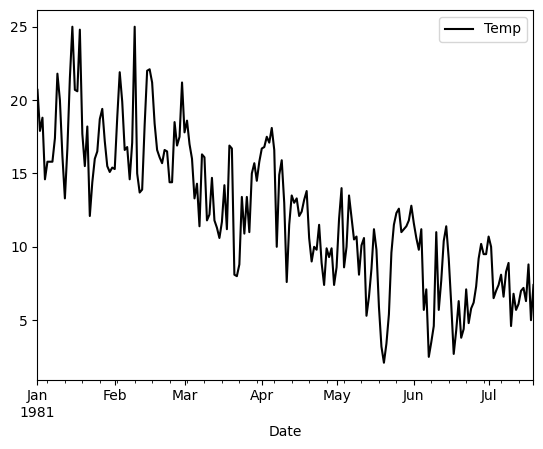

In [8]:
df[:200].plot(color = 'k')

In [9]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df['Temp'], autolag = 'AIC')

In [10]:
print("1 ADF : ", dftest[0])

1 ADF :  -4.444804924611688


In [11]:
print("2 P-Value : ", dftest[1])

2 P-Value :  0.0002470826300361109


In [12]:
print("3 Num of Lags : " ,dftest[2])

3 Num of Lags :  20


In [13]:
print("4 Number of observation used for ADF Regression and critical values Calculateion : " ,dftest[3])

4 Number of observation used for ADF Regression and critical values Calculateion :  3629


In [14]:
print("5 Critical Values : ")
for key, val in dftest[4].items():
    print("\t", key, ": ", val)

5 Critical Values : 
	 1% :  -3.4321532327220154
	 5% :  -2.862336767636517
	 10% :  -2.56719413172842


In [15]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

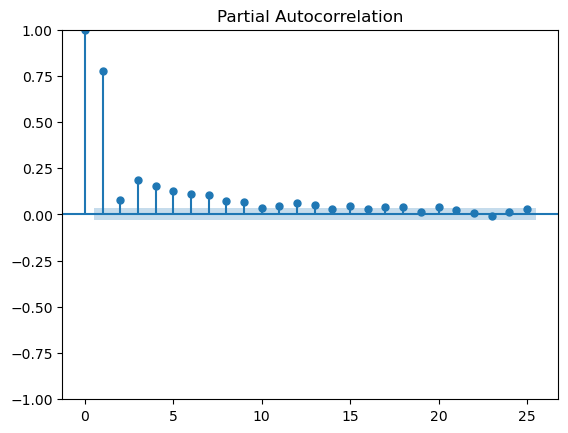

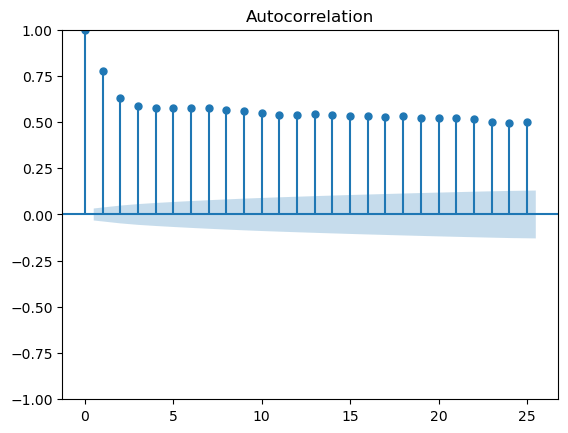

In [16]:
pacf = plot_pacf(df['Temp'], lags = 25)
acf = plot_acf(df['Temp'], lags = 25)

In [17]:
train = X[:len(X)-7]
test = X[len(X)-7:]

In [18]:
model = AutoReg(train, lags = 10)

In [19]:
model_fit = model.fit()
print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 3643
Model:                    AutoReg(10)   Log Likelihood               -8375.514
Method:               Conditional MLE   S.D. of innovations              2.427
Date:                Thu, 20 Mar 2025   AIC                          16775.028
Time:                        14:41:44   BIC                          16849.402
Sample:                            10   HQIC                         16801.521
                                 3643                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9350      0.142      6.603      0.000       0.657       1.213
y.L1           0.6103      0.017     36.795      0.000       0.578       0.643
y.L2          -0.0832      0.019     -4.289      0.0

In [20]:
print(len(train))

3643


In [21]:
print(len(test))

7


Make Prediction on Test Set and Compare

In [22]:
pred = model_fit.predict(start = len(train), end = len(train) + len(test) - 1, dynamic = False)

In [23]:
print(len(pred))

7


In [24]:
print(len(test))

7


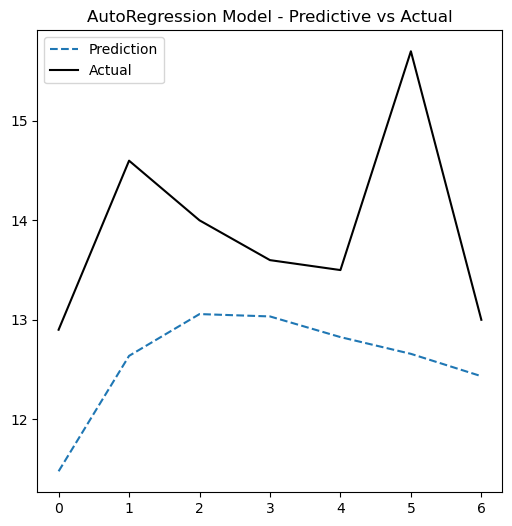

[11.47679312 12.63726604 13.0574664  13.03378918 12.8259307  12.65767226
 12.43273596]


In [25]:
import matplotlib.pyplot as plt 
plt.figure(figsize = (6,6))
plt.plot(pred ,label = 'Prediction', linestyle = 'dashed')
plt.plot(test, label = 'Actual', linestyle = 'solid', color = 'k')
plt.legend()
plt.title('AutoRegression Model - Predictive vs Actual')
plt.show()

print(pred)

In [26]:
pred_future=model_fit.predict(start=len(X),end=len(X)+6,dynamic=False)

print("The Future prediction for the next week")
print(pred_future)
print("Number of Prediction Made:",len(pred_future))

The Future prediction for the next week
[12.36671014 12.28608804 12.20309536 12.24915916 12.30618875 12.31199689
 12.27225975]
Number of Prediction Made: 7
